In [17]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ralbu85/DataScience_2022S/master/data/titanic_processed.csv")
df

,age,sibsp,parch,fare,pclass_1.0,pclass_2.0,pclass_3.0,sex_female,embarked_C,embarked_Q,embarked_S,survived
0,29.0000,0.0,0.0,211.3375,1,0,0,1,0,0,1,1
1,0.9167,1.0,2.0,151.5500,1,0,0,0,0,0,1,1
2,2.0000,1.0,2.0,151.5500,1,0,0,1,0,0,1,0
3,30.0000,1.0,2.0,151.5500,1,0,0,0,0,0,1,0
4,25.0000,1.0,2.0,151.5500,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1038,45.5000,0.0,0.0,7.2250,0,0,1,0,1,0,0,0
1039,14.5000,1.0,0.0,14.4542,0,0,1,1,1,0,0,0
1040,26.5000,0.0,0.0,7.2250,0,0,1,0,1,0,0,0
1041,27.0000,0.0,0.0,7.2250,0,0,1,0,1,0,0,0


In [18]:
#학습

In [19]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [20]:
#데이터 분리(종속,독립)

In [21]:
df.columns

Index(['age', 'sibsp', 'parch', 'fare', 'pclass_1.0', 'pclass_2.0',
       'pclass_3.0', 'sex_female', 'embarked_C', 'embarked_Q', 'embarked_S',
       'survived'],
      dtype='object')

In [22]:
#리스트 슬라이싱
#list[시작:종료] 

In [23]:
x= df[df.columns[:-1]]
y= df ['survived']

In [24]:
#학습
reg.fit(x,y)

c:\Users\hwang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
#정확도 측정
y_pred= reg.predict(x)
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [16]:
import numpy as np
np.sum(y_pred == y)/y.count()

0.7919463087248322

In [27]:
a = reg.coef_
a

array([[-3.82082040e-02, -3.29769752e-01,  5.74443572e-02,
         3.29257445e-04,  1.04268473e+00, -6.71167588e-02,
        -9.92268139e-01,  2.50301912e+00,  6.18979007e-01,
        -6.23562528e-01, -1.21166449e-02]])

<BarContainer object of 11 artists>

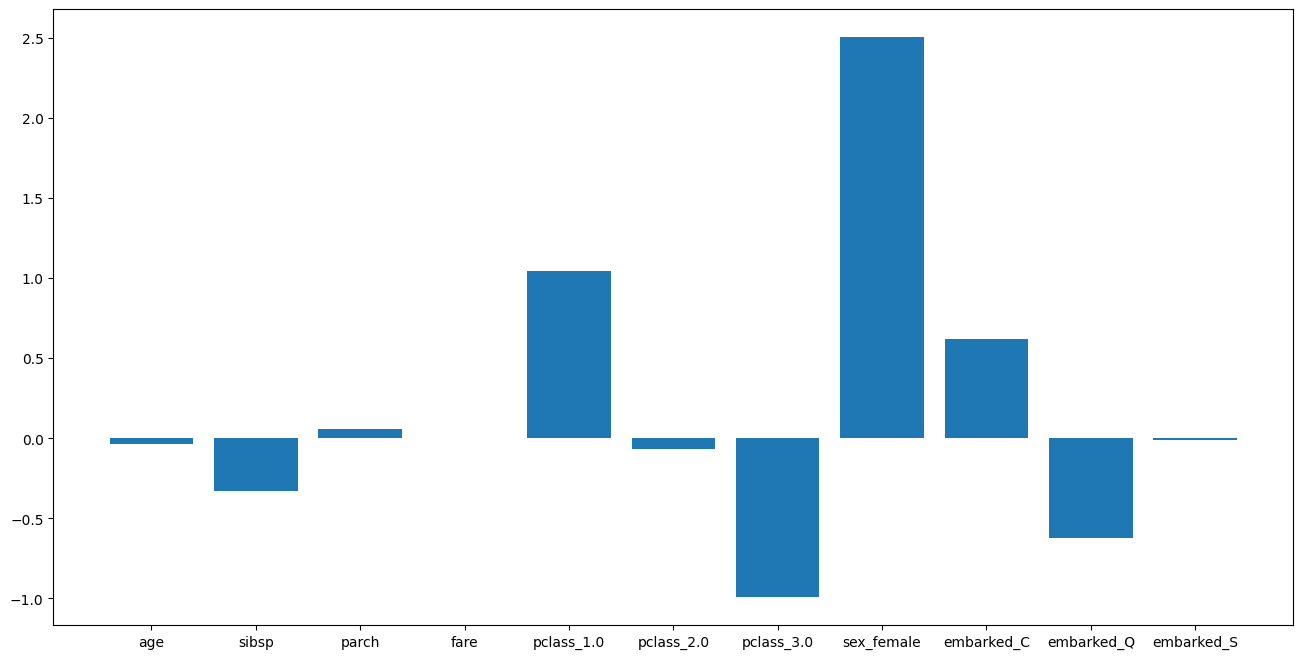

In [11]:
#결과 해석
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.bar(x.columns, reg.coef_[0])


In [12]:
#데이터 표준화

In [13]:
x_norm = (x-x.mean())/x.std()

In [14]:
reg.fit(x_norm,y)

LogisticRegression()

<BarContainer object of 11 artists>

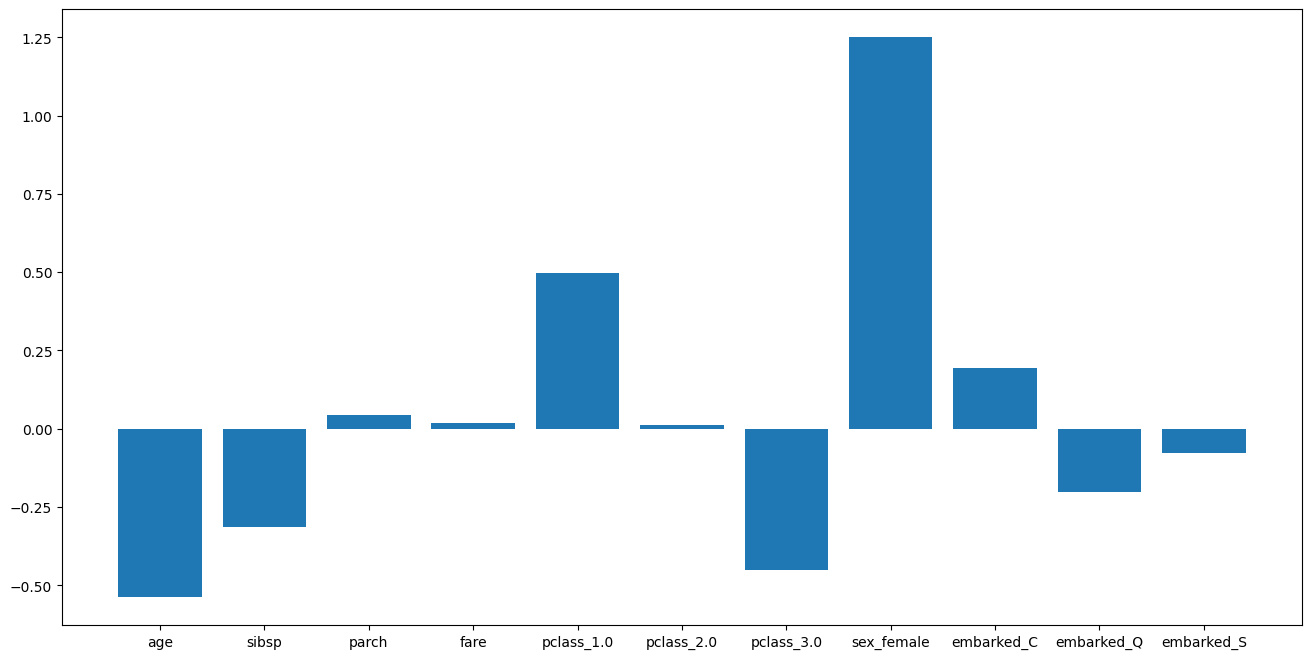

In [15]:
plt.figure(figsize=(16,8))
plt.bar(x.columns, reg.coef_[0]) #정확도는 낮지만 어떤것들이 크게 영향을 주는지 알수 있다.